In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv('../input/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isnull().values.any()

False

In [8]:
import datetime
def get_year(date):
    date = str(date)
    year = date[0:4]
    month = date[4:6]
    day = date[6:8]
    date = year+'-'+month+'-'+day
    date = datetime.datetime.strptime(date, '%Y-%m-%d')    
    return date

In [9]:
data['date'] = data['date'].apply(get_year)

In [10]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


A point to notice is that square feet living = sq. feet above + sq. feet basement. What we can rather do is have a categorical column for if there is a basement of not and delete the sq. feet above and sq. feet basement columns altogether. Afterall what matters is the total living area and if there is a basement there or not. The area of the basement would not have a major affect of its own as such as it is already included in the total living area

In [11]:
data['is_basement'] = data['sqft_basement'].apply(lambda x: 1 if x != 0 else 0)

In [12]:
#updating living room area and lot area based on the new values of 2015
data = data.drop(['sqft_living','sqft_lot','sqft_basement','sqft_above'],axis=1)

In [13]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,0


In [14]:
def update_yr_built(cols):
    yr_built = cols[0]
    yr_renovated = cols[1]
    if yr_renovated != 0:
        yr_built = yr_renovated
        
    return yr_built
data['yr_built'] = data[['yr_built','yr_renovated']].apply(update_yr_built,axis=1)

In [15]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1991,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,0


In [16]:
data = data.drop('yr_renovated',axis=1)

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,1.0,0,0,3,6,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1.0,0,0,5,7,1965,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1.0,0,0,3,8,1987,98074,47.6168,-122.045,1800,7503,0


In [18]:
data = data.drop(['id','view','lat','long'],axis=1)
data.head()

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
0,2014-10-13,221900.0,3,1.00,1.0,0,3,7,1955,98178,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2.0,0,3,7,1991,98125,1690,7639,1
2,2015-02-25,180000.0,2,1.00,1.0,0,3,6,1933,98028,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1.0,0,5,7,1965,98136,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1.0,0,3,8,1987,98074,1800,7503,0


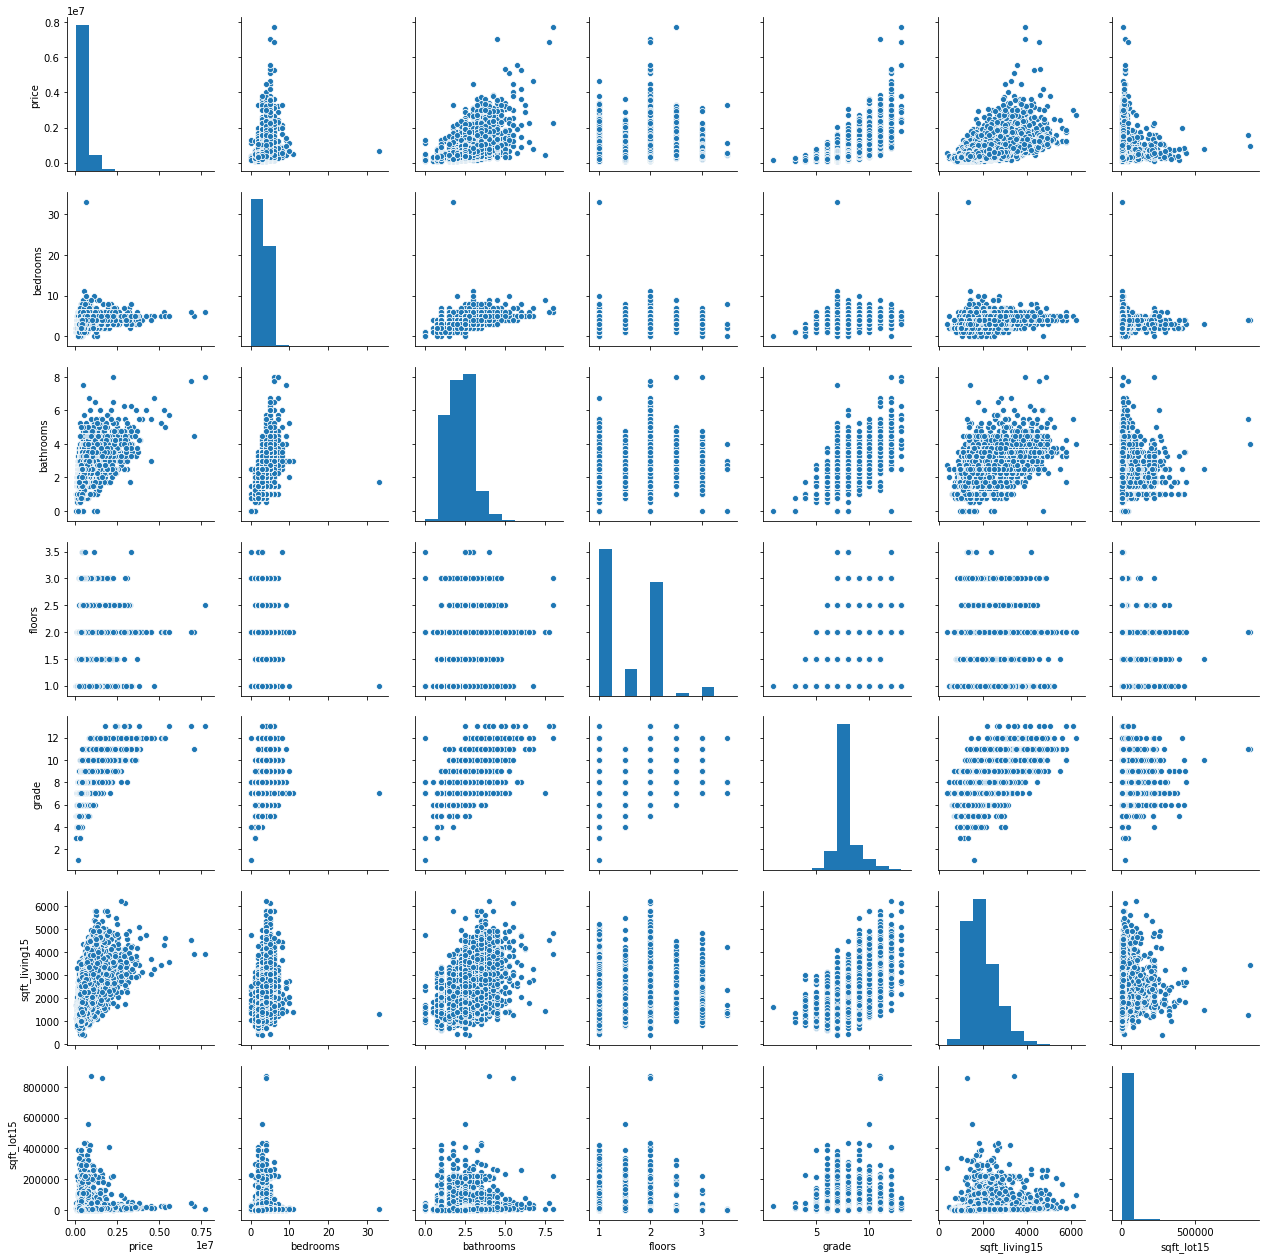

In [19]:
sns.pairplot(data.drop(['date','condition','yr_built','zipcode','waterfront','is_basement'],axis=1))

In [20]:
data.groupby('waterfront').mean()

,price,bedrooms,bathrooms,floors,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
waterfront,,,,,,,,,,,
0,5.315636e+05,3.371375,2.110478,1.493193,3.408485,7.648392,1973.387366,98077.798555,1981.386667,12695.378089,0.391096
1,1.661876e+06,3.300613,2.677914,1.641104,3.533742,8.773006,1973.208589,98096.527607,2666.349693,22385.104294,0.601227


That's weird - An avg house having a waterfront is larger in size but way more cheaper. Maybe houses having a waterfront are in the outskirts where the prices are very low.

In [21]:
#percentage of households having a waterfront
(data['waterfront'].sum()/len(data))*100

0.7541757275713691

Not even 1% of the households that we have, have a waterfront.

In [22]:
data.groupby('is_basement').mean()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
is_basement,,,,,,,,,,,
0,486884.090507,3.248591,2.013485,1.605706,0.004952,3.338488,7.607877,1976.719259,98070.928539,1962.397379,13662.736706
1,622373.563803,3.559915,2.271386,1.322022,0.011547,3.519147,7.732650,1968.230824,98088.783433,2023.910805,11385.359962


Having a basement is a plus point. It increases the prices! (Area of living is almost the same)

In [23]:
#percentage of households having a basement
(data['is_basement'].sum()/len(data))*100

39.26803312820987

In [24]:
data.head()

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,is_basement
0,2014-10-13,221900.0,3,1.00,1.0,0,3,7,1955,98178,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2.0,0,3,7,1991,98125,1690,7639,1
2,2015-02-25,180000.0,2,1.00,1.0,0,3,6,1933,98028,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1.0,0,5,7,1965,98136,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1.0,0,3,8,1987,98074,1800,7503,0


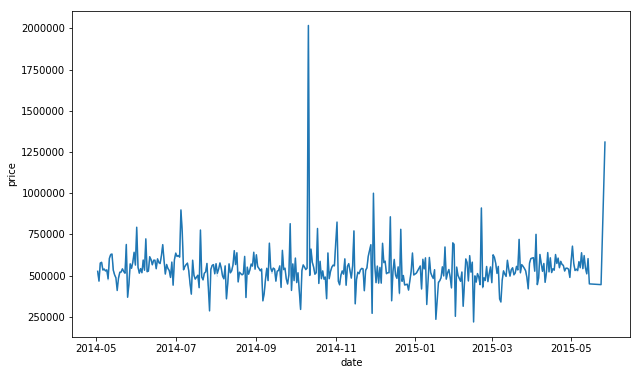

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='date',y='price',data=data,ci=False)

The prices have remained fairly consistent throughout both the years.

In [26]:
data = data.drop('date',axis=1)

Lets predict the prices 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = data.drop('price',axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
norm_X_train = scaler.fit_transform(X_train)

In [31]:
norm_X_test = scaler.fit_transform(X_test)

In [32]:
norm_X_train = pd.DataFrame(data=norm_X_train,columns=X_train.columns)

In [33]:
norm_X_test = pd.DataFrame(data=norm_X_test,columns=X_test.columns)

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [35]:
def build_model():
    model = keras.Sequential([
        layers.Dense(60, activation=tf.nn.relu, input_shape=[len(norm_X_train.keys())]),
        layers.Dropout(0.5),
        layers.Dense(60, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)),
        layers.Dropout(0.5),
        layers.Dense(60, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)),
        layers.Dense(1)
          ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [36]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                720       
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________


In [38]:
EPOCHS = 1500


In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    
    plt.legend()
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    
    plt.legend()
    plt.show()

#plot_history(history)

In [40]:
#hist = pd.DataFrame(history.history)
#hist['epoch'] = history.epoch
#hist.tail()

In [41]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(norm_X_train, y_train, epochs=EPOCHS,batch_size=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])


Instructions for updating:
Use tf.cast instead.


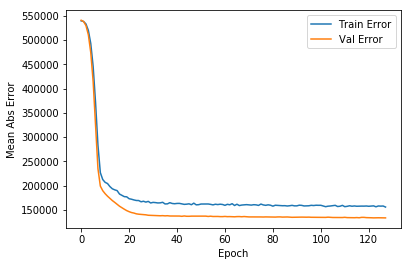

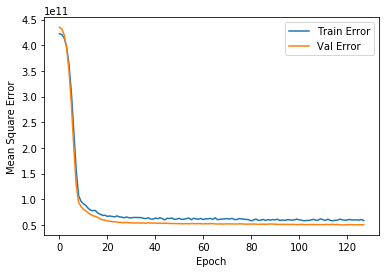

In [42]:
plot_history(history)

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
123,5.949023e+10,156091.781250,5.949021e+10,4.989918e+10,133444.343750,4.989918e+10,123
124,5.966938e+10,157766.843750,5.966937e+10,4.999358e+10,133445.671875,4.999357e+10,124
125,5.914141e+10,157459.750000,5.914140e+10,4.988172e+10,133394.375000,4.988172e+10,125
126,6.040686e+10,157699.328125,6.040685e+10,5.034565e+10,133145.640625,5.034565e+10,126
127,5.809455e+10,155565.734375,5.809454e+10,5.020674e+10,133193.921875,5.020673e+10,127


In [44]:
loss, mae, mse = model.evaluate(norm_X_train, y_train, verbose=0)

print("Training set Mean Abs Error: {:5.2f}".format(mae))

Training set Mean Abs Error: 131865.91


In [45]:
data['price'].mean()

540088.1417665294

(0, 2000000)

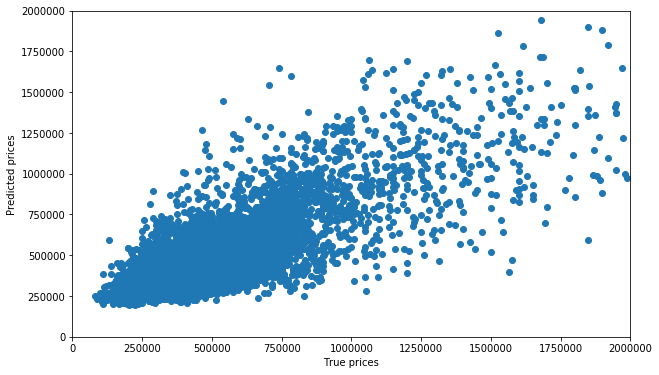

In [46]:
test_predictions = model.predict(norm_X_test).flatten()
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_predictions)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.xlim(0,2000000)
plt.ylim(0,2000000)

In [47]:
loss, mae, mse = model.evaluate(norm_X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Testing set Mean Abs Error: 135946.47


(0, 2000000)

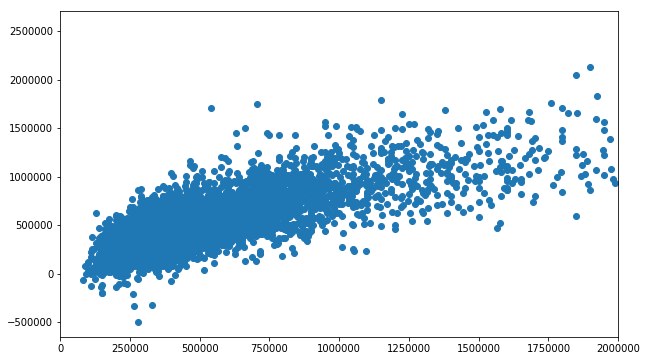

In [48]:
#using linear regression - 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(norm_X_train,y_train)
predictions = lm.predict(norm_X_test)
plt.figure(figsize=(10,6))
ax = plt.scatter(y_test,predictions)
plt.xlim(0,2000000)


In [49]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

153846.60956545835